In [1]:
import numpy as np
import pygtrie
from statsmodels.stats import multitest
import collections
import os
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib

import sys
sys.path.append('../')
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 72)

In [2]:
from scipy import stats

def read_tejaas(filename):
    rsidlist = list()
    bplist   = list()
    qscales = list()
    pvallist = list()
    qstatlist = list()
    qmeanlist = list()
    qstdlist = list()

    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            rsid = linesplit[0]
            bppos = int(linesplit[1])
            pval = float(linesplit[5])
            
            qstat = float(linesplit[2])
            qmean = float(linesplit[3])
            qstd  = float(linesplit[4])
            
            rsidlist.append(rsid)
            bplist.append(bppos)
            qstatlist.append(qstat)
            qmeanlist.append(qmean)
            qstdlist.append(qstd)
            pvallist.append(pval)

    #pvalarr = 2.0 * (1 - stats.norm.cdf(np.abs(qscales)))
    #pvalarr = 1 - stats.norm.cdf(np.array(qscales))
    #pvallist = [x for x in pvalarr]
    return rsidlist, bplist, pvallist, qstatlist, qmeanlist, qstdlist

In [15]:
resdir = "/cbscratch/franco/trans-eqtl/dev-pipeline/randomizations/norm"
tissue = "gtex-ms"
chrm = 7

gwrsids = list()
gwpvals = list()
gwnsnps = dict()
gwbppos = dict()
gwqstat = list()
gwqmean = list()
gwqstds = list()
for rand in range(1, 10):
    chrdir = "chr{:d}".format(chrm)
    srcdir = os.path.join(resdir, tissue)
    rrfile = os.path.join(srcdir, 'tejaas_rand_{:d}/permnull_sb0.05/{:s}/chunk000_rr.txt'.format(rand, chrdir))
    rsids, bplist, pvals, qstats, qmeans, qstds = read_tejaas(rrfile)
    gwrsids += rsids
    gwpvals += pvals
    gwqstat += qstats
    gwqmean += qmeans
    gwqstds += qstds
    gwnsnps[chrm] = len(rsids)
    gwbppos[chrm] = np.array(bplist)

In [16]:
gwpvals = np.array(gwpvals)
pmax  = np.max(gwpvals[np.where(gwpvals > 0)])
nonzero_pvals = gwpvals.copy()
nonzero_pvals[np.where(gwpvals == 0)] = pmax
gwlogpvals = -np.log10(nonzero_pvals)

gwqstat = np.array(gwqstat)
gwqmean = np.array(gwqmean)
gwqstds = np.array(gwqstds)

In [13]:
resdir = "/cbscratch/franco/trans-eqtl/dev-pipeline/randomizations/lmcorrected_age"
tissue = "gtex-ms"
chrm = 7

gwrsids2 = list()
gwpvals2 = list()
gwnsnps2 = dict()
gwbppos2 = dict()
gwqstat2 = list()
gwqmean2 = list()
gwqstds2 = list()
for rand in range(1, 10):
    chrdir = "chr{:d}".format(chrm)
    srcdir = os.path.join(resdir, tissue)
    rrfile = os.path.join(srcdir, 'tejaas_rand_{:d}/permnull_sb0.05/{:s}/chunk000_rr.txt'.format(rand, chrdir))
    rsids, bplist, pvals, qstats, qmeans, qstds = read_tejaas(rrfile)
    gwrsids2 += rsids
    gwpvals2 += pvals
    gwqstat2 += qstats
    gwqmean2 += qmeans
    gwqstds2 += qstds
    gwnsnps2[chrm] = len(rsids)
    gwbppos2[chrm] = np.array(bplist)

In [14]:
gwpvals2 = np.array(gwpvals2)
pmax  = np.max(gwpvals2[np.where(gwpvals2 > 0)])
nonzero_pvals = gwpvals2.copy()
nonzero_pvals[np.where(gwpvals2 == 0)] = pmax
gwlogpvals2 = -np.log10(nonzero_pvals)

gwqstat2 = np.array(gwqstat2)
gwqmean2 = np.array(gwqmean2)
gwqstds2 = np.array(gwqstds2)

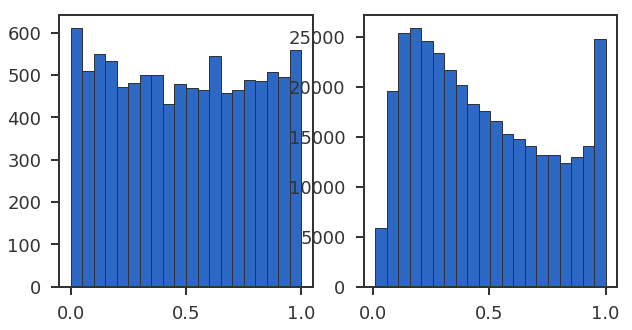

In [17]:
# Check the p-value distribution
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
ax1.hist(gwpvals[nchoose])
ax2.hist(gwpvals2)
plt.show()

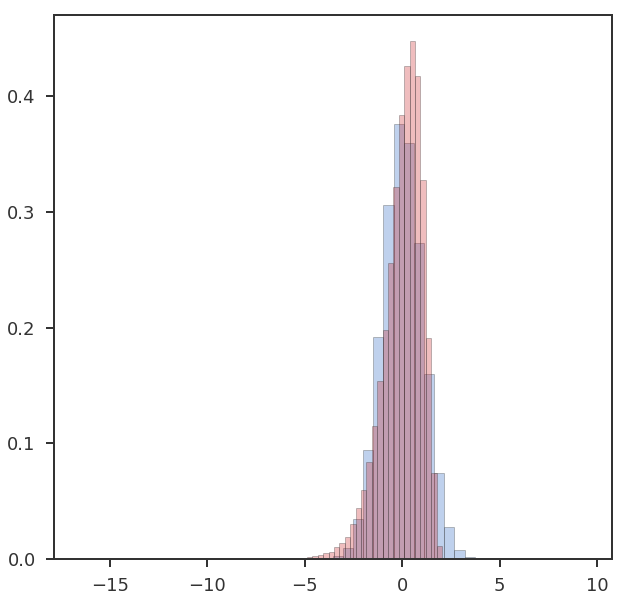

In [19]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)

nchoose = np.where(gwqstds != 0)

#nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
ax1.hist((gwqstat[nchoose] - gwqmean[nchoose]) / gwqstds[nchoose], bins = 50, density = True, alpha = 0.3)
ax1.hist((gwqstat2 - gwqmean2) / gwqstds2, bins = 50, density = True, alpha = 0.3)
#ax1.hist(gwqstds)
#ax2.hist(gwqstds2)
# ax1.set_xlim([-5, 5])
# ax2.set_xlim([-5, 5])
plt.show()

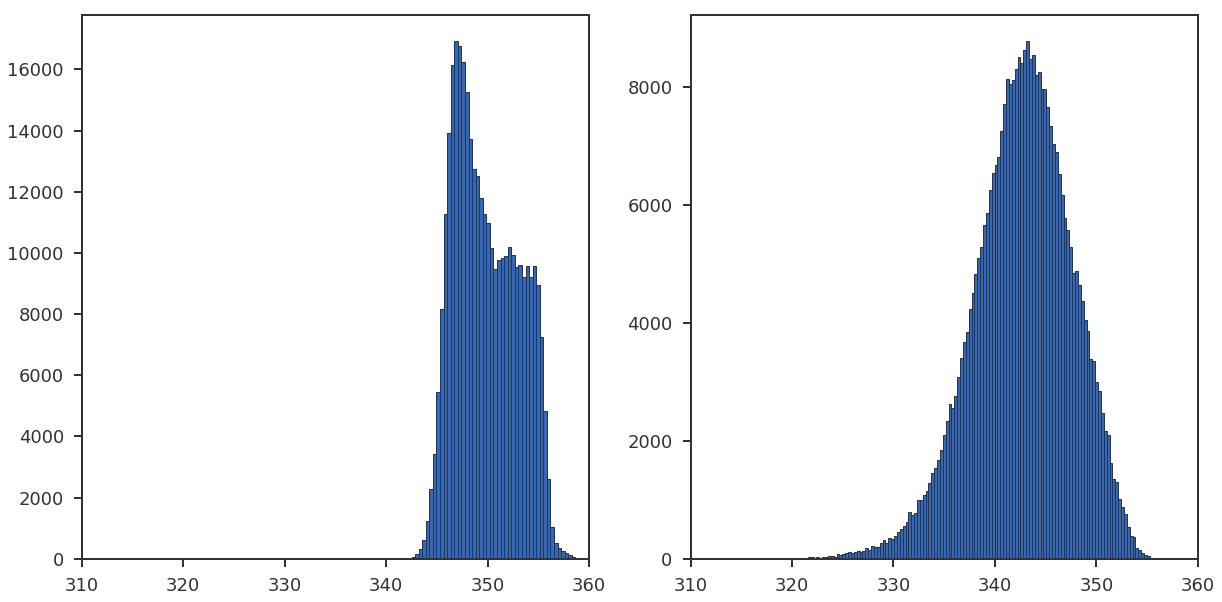

In [24]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
ax1.hist(gwqstat[nchoose], bins = 50)
ax2.hist(gwqstat2[nchoose], bins = 200)
#ax1.scatter(gwqstat[nchoose],  gwqmean[nchoose], s = 1, alpha = 0.9)
#ax2.scatter(gwqstat2[nchoose], gwqmean2[nchoose], s = 1, alpha = 0.9)
#ax1.plot([25, 175], [25, 175], color = 'red')
#ax2.plot([25, 175], [25, 175], color = 'red')
ax1.set_xlim([310, 360])
ax2.set_xlim([310, 360])
plt.show()

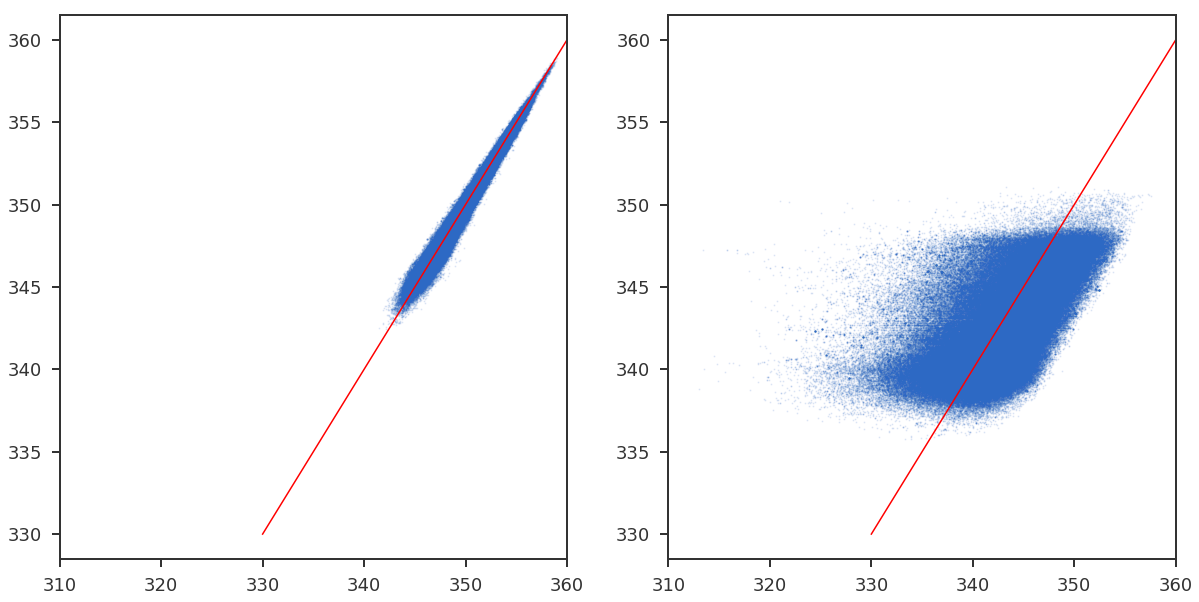

In [28]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
#ax1.hist(gwpvals[nchoose])
#ax2.hist(gwpvals2[nchoose])
ax1.scatter(gwqstat[nchoose],  gwqmean[nchoose], s = 1, alpha = 0.1)
ax2.scatter(gwqstat2[nchoose], gwqmean2[nchoose], s = 1, alpha = 0.1)
ax1.plot([330, 360], [330, 360], color = 'red')
ax2.plot([330, 360], [330, 360], color = 'red')
ax1.set_xlim([310, 360])
ax2.set_xlim([310, 360])
plt.show()

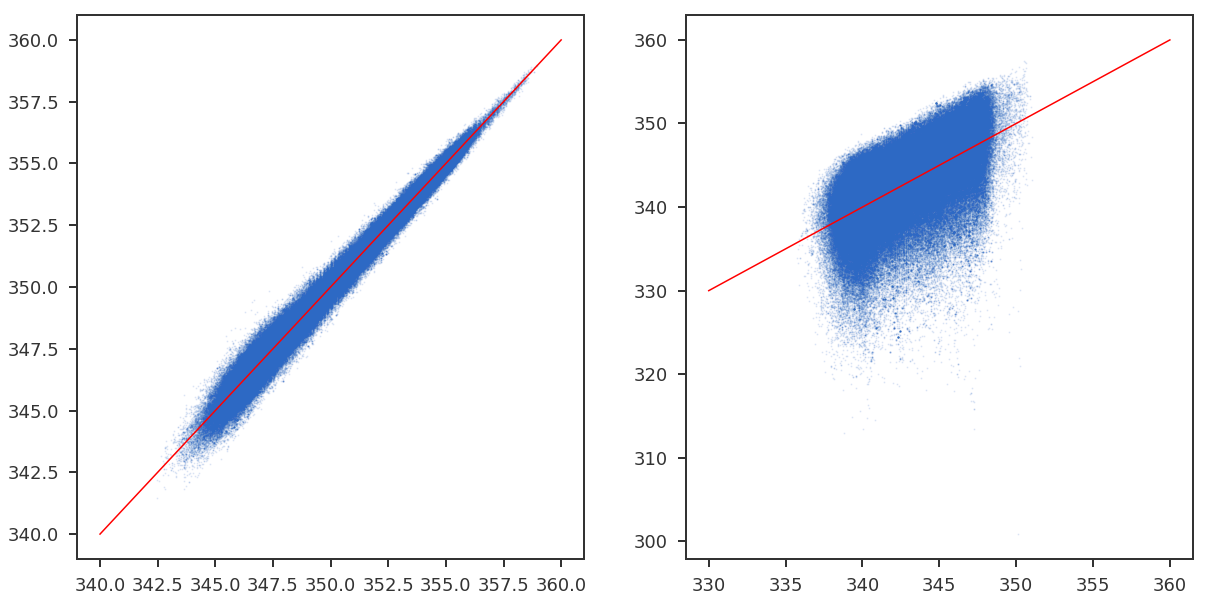

In [27]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
#ax1.hist(gwpvals[nchoose])
#ax2.hist(gwpvals2[nchoose])
ax1.scatter(gwqmean[nchoose],  gwqstat[nchoose], s = 1, alpha = 0.1)
ax2.scatter(gwqmean2[nchoose], gwqstat2[nchoose], s = 1, alpha = 0.1)
ax1.plot([340, 360], [340, 360], color = 'red')
ax2.plot([330, 360], [330, 360], color = 'red')
#ax1.set_xlim([330, 360])
#ax1.set_ylim([330, 360])
plt.show()

In [29]:
gwqstat.shape

(39282,)